In [21]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
import matplotlib.pyplot as plt

In [8]:
ts = pd.read_csv(r'C:\Users\Owner\Documents\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\BTC-USD.csv')

In [9]:
ts = ts["Close"].values
ts = np.log(ts)

In [10]:
train_size = int(len(ts)*0.70)
train, test = ts[:train_size], ts[train_size:]

In [15]:
lowest_bic = None
best_p = None
best_q = None

for p in range(1,4):
    for q in range(1,4):
        #create model
        model=ARIMA(train, order=(p,1,q))
        results = model.fit()

        #select model based on BIC
        bic = results.bic
        # print(f"AR({p}), MA({q}), BIC: {bic}")
        if lowest_bic == None:
            lowest_bic = bic
            best_p = p
            best_q = q
        elif bic < lowest_bic:
            lowest_bic = bic
            best_p = p
            best_q = q

print(f"Best ARIMA order: ({best_p},1,{best_q})")

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ow

Best ARIMA order: (1,1,1)


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
model = ARIMA(train, order=(1,1,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  255
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 485.472
Date:                Tue, 24 Oct 2023   AIC                           -964.944
Time:                        15:18:57   BIC                           -954.332
Sample:                             0   HQIC                          -960.675
                                - 255                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8470      0.759      1.116      0.265      -0.641       2.335
ma.L1         -0.8312      0.796     -1.044      0.296      -2.392       0.729
sigma2         0.0013   7.59e-05     16.868      0.0

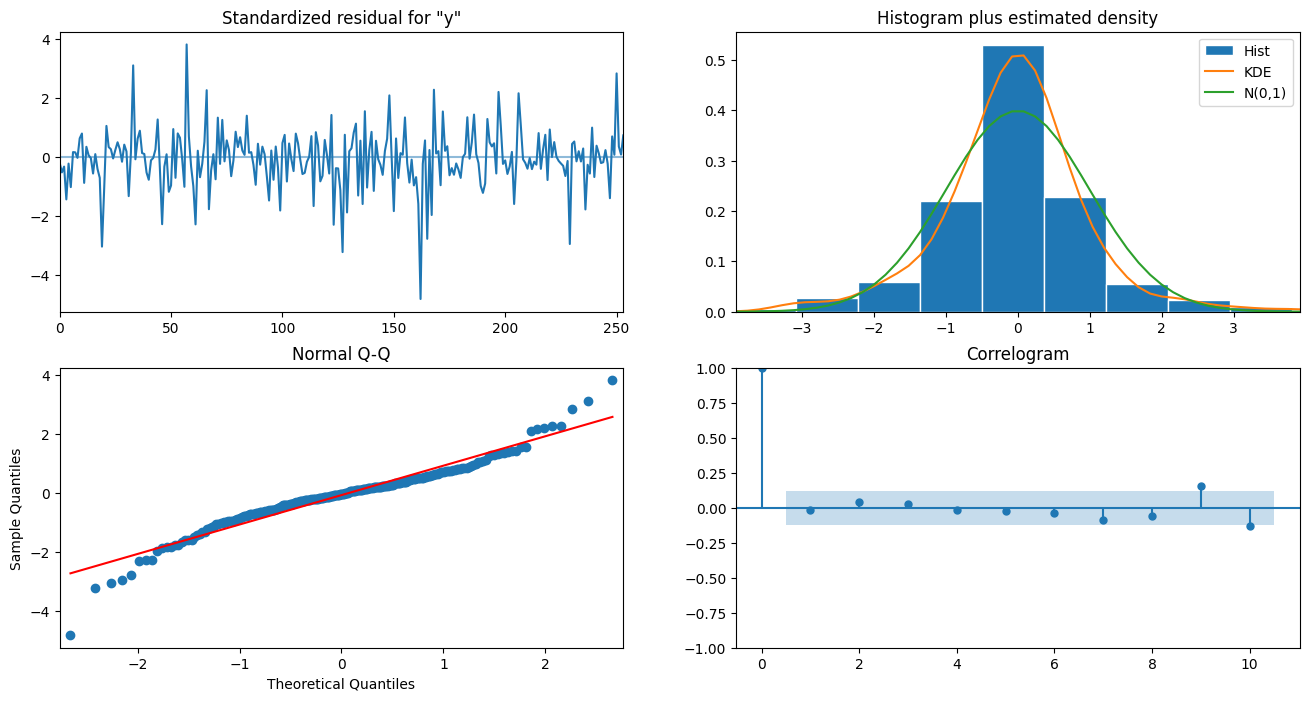

In [19]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [32]:
lagrange_t_stat, p_value, _, _ = acorr_breusch_godfrey(results, nlags=12)
print(f"Results from Breusch-Godfrey Test\nTest-Statistic: {lagrange_t_stat}\nP-Value: {p_value}")

if p_value <= 0.05:
    print(f"Reject the null hypothesis. Presence of serial correlation in the residuals is likely.")
else: 
    print(f"Fail to reject the null hypothesis. Evidence does not suggest serial correlation.")


Results from Breusch-Godfrey Test
Test-Statistic: 0.07084981646877264
P-Value: 0.9999999999973372
Fail to reject the null hypothesis. Evidence does not suggest serial correlation.
